In [1]:
%config IPCompleter.greedy=True
# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import display # Allows the use of display() for DataFrames


# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.grid_search import GridSearchCV

# data analysis
import pandas as pd
import numpy as np

holdout = pd.read_csv("test.csv")
train = pd.read_csv("train.csv")
display(train.head())
print("Dimensions of train: {}".format(train.shape))
print("Dimensions of test: {}".format(holdout.shape))


C:\Users\vishn\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\vishn\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Dimensions of train: (891, 12)
Dimensions of test: (418, 11)


In [2]:
outcomes = train['Survived']
trainData = train.drop(['Survived'], axis =1)
# display(outcomes.head())
# display(trainData.head())

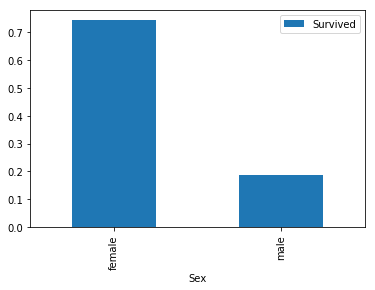

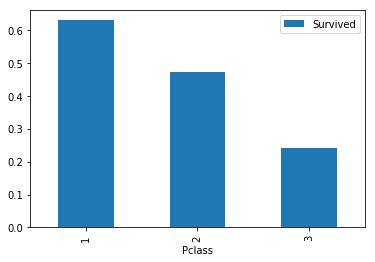

In [3]:
sex_pivot = train.pivot_table(index="Sex",values="Survived")
sex_pivot.plot.bar()
class_pivot = train.pivot_table(index="Pclass",values="Survived",)
class_pivot.plot.bar()
plt.show()

In [4]:
#Age
train["Age"].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

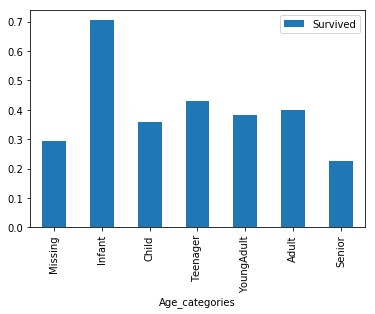

In [5]:
def processedAge(df,cutpoints, label):
    df["Age"] = df["Age"].fillna(-0.5)
    df["Age_categories"] = pd.cut(df["Age"],cut_points,labels=label_names)
    return df

cut_points = [-1,0,5,12,18,35,60,100]
label_names = ["Missing","Infant","Child","Teenager","YoungAdult","Adult","Senior"]

train = processedAge(train,cut_points,label_names)
holdout = processedAge(holdout,cut_points,label_names)

pivot = train.pivot_table(index="Age_categories",values='Survived')
pivot.plot.bar()
plt.show()

In [6]:
def create_dummies(df,column_name):
    dummies = pd.get_dummies(df[column_name],prefix=column_name)
    df = pd.concat([df,dummies],axis=1)
    return df

for column in ["Pclass","Sex","Age_categories"]:
    train = create_dummies(train,column)
    holdout = create_dummies(holdout,column)
display(train)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Pclass_3,Sex_female,Sex_male,Age_categories_Missing,Age_categories_Infant,Age_categories_Child,Age_categories_Teenager,Age_categories_YoungAdult,Age_categories_Adult,Age_categories_Senior
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,1,0,1,0,0,0,0,1,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,0,1,0,0,0,0,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,1,1,0,0,0,0,0,1,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,0,1,0,0,0,0,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,1,0,1,0,0,0,0,1,0,0
5,6,0,3,"Moran, Mr. James",male,-0.5,0,0,330877,8.4583,...,1,0,1,1,0,0,0,0,0,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,...,0,0,1,0,0,0,0,0,1,0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,...,1,0,1,0,1,0,0,0,0,0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,...,1,1,0,0,0,0,0,1,0,0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,...,0,1,0,0,0,0,1,0,0,0


In [7]:
# Test accuracy function
testpredictions = pd.Series(np.ones(5, dtype = int))
print(accuracy_score(outcomes[:5], testpredictions))

0.6


In [8]:
#Splitting Training data
columns = ['Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_female', 'Sex_male',
       'Age_categories_Missing','Age_categories_Infant',
       'Age_categories_Child', 'Age_categories_Teenager',
       'Age_categories_YoungAdult', 'Age_categories_Adult',
       'Age_categories_Senior']
all_X = train[columns]
all_y = train['Survived']
train_X, test_X, train_y, test_y = train_test_split(all_X, all_y, test_size=0.20,random_state=0)

In [9]:
def predictionModel(data):
    predictions = []
    for _, passenger in data.iterrows():
        
        age=range(40,50)
        if(passenger['Sex'] == 'female'):
            if((passenger['Age'] in age) and (passenger['Pclass'] == 3)):
                predictions.append(0)
            else:
                predictions.append(1)
            
        elif(passenger['Sex'] == 'male' and passenger['Age'] <= 10):
            predictions.append(1)
        else:
            predictions.append(0)
    
    return pd.Series(predictions)

# My Prediction
predictions = predictionModel(trainData)
holdoutPredictions = predictionModel(trainData)

In [20]:
#LogisticpredictionModel
lrPrediction = []
lr = LogisticRegression(random_state=0)        
lr.fit(train_X, train_y)
lrPrediction=lr.predict(test_X)

#holdoutLogisticpredictionModel
holdoutlrPrediction = []
lrh = LogisticRegression(random_state=0)        
lrh.fit(all_X,all_y)
holdoutlrPrediction = lrh.predict(holdout[columns])

In [21]:
# DecisionTreeModel
dtPrediction = []
parameter_grid = {'max_depth': [1,2,3,4,5,6,7,8,9,10],'min_samples_leaf': [1,2,3,4,5,6,7,8,9,10],'min_samples_split': [2,3,4,5,6,7,8,9,10]}
dt = GridSearchCV(DecisionTreeClassifier(random_state=0), parameter_grid)
#dt = DecisionTreeClassifier(max_depth=6, min_samples_leaf=6, min_samples_split=6)
dt.fit(train_X, train_y)
dtPrediction = dt.predict(test_X)


# holdoutDecisionTreeModel
dtHoldoutPrediction = []
dth = GridSearchCV(DecisionTreeClassifier(random_state=0), parameter_grid)
#dth = DecisionTreeClassifier(max_depth=6, min_samples_leaf=6, min_samples_split=6)
dth.fit(all_X, all_y)
dtHoldoutPrediction = dth.predict(holdout[columns])

print("Best Score: {}".format(dt.best_score_))
print("Best params: {}".format(dt.best_params_))

Best Score: 0.8132022471910112
Best params: {'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [22]:
# RandomForrestModel
rfPrediction = []
#rf = GridSearchCV(RandomForestClassifier(), parameter_grid)
rf = RandomForestClassifier(max_depth=4, min_samples_leaf=1, min_samples_split=4,random_state=0)
rf.fit(train_X, train_y)
rfPrediction = rf.predict(test_X)

In [23]:
#Testing Acccuracy
print(accuracy_score(outcomes, predictions))
print(accuracy_score(test_y, lrPrediction))
print(accuracy_score(test_y, dtPrediction))
print(accuracy_score(test_y, rfPrediction))

0.8024691358024691
0.8100558659217877
0.8268156424581006
0.8156424581005587


In [14]:
testData = pd.read_csv("test.csv")
submission = pd.DataFrame({"PassengerId" : holdout["PassengerId"], "Survived" : dtHoldoutPrediction})
submission.to_csv("submission.csv", index = False)
